In [561]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pycountry_convert as pc
import geopandas as gpd

df = pd.read_csv('unemployment.csv')

#cleaning data
#dropping all names in the country column which isn't officially country or member states such EU or HIPC

df.rename(columns={'Country Name': 'country'}, inplace = True)
df = df.drop(df.index[[0,2,5,31,33,44,53,54,55,56,57,60,65,66,82,85,89,91,92,90,94,111,117,118,119,121,122,124,
                      133,135,140,148,158,160,167,172,173,174,180,190,192,193,202,203,208,209,210,212,213,220,226
                      ,229]])
#renaming countries which was mispelt or spelt in different language

df.loc[19,'country']= 'Bahamas'
df.loc[36,'country']= 'Ivory Coast'
df.loc[38,'country']= 'Democratic Republic of the Congo'
df.loc[39,'country']= 'Republic of the Congo'
df.loc[59,'country']= 'Egypt'
df.loc[75,'country']= 'Gambia'
df.loc[83,'country']= 'Hong Kong'
df.loc[97,'country']= 'Iran'
df.loc[109,'country']= 'South Korea'
df.loc[112,'country']= 'Laos'
df.loc[128,'country']= 'Macao'
df.loc[169,'country']= 'North Korea'
df.loc[216,'country']= 'Turkey'
df.loc[224,'country']= 'Saint Vincent and the Grenadines'
df.loc[225,'country']= 'Venezuela'
df.loc[231,'country']='Yemen'
df.head(5)

,country,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
6,United Arab Emirates,ARE,1.87,1.84,1.85,1.81,1.80,1.90,1.98,2.14,...,2.18,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36
7,Argentina,ARG,5.44,6.36,10.10,11.76,18.80,17.11,14.82,12.65,...,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90


In [562]:
#converting country name to continent code
def convert (row):
    country_code=pc.country_name_to_country_alpha2(row.country, cn_name_format='default')
    conti_code = pc.country_alpha2_to_continent_code(country_code)
    return conti_code
df['continent']= df.apply(convert, axis = 1)
df.head(5)

,country,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,continent
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28,AS
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53,AF
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82,EU
6,United Arab Emirates,ARE,1.87,1.84,1.85,1.81,1.80,1.90,1.98,2.14,...,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36,AS
7,Argentina,ARG,5.44,6.36,10.10,11.76,18.80,17.11,14.82,12.65,...,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90,SA


In [563]:
#mapping continent code to continent names
conti_names= { "AS": "Asia", 
              "SA": "South America",
              "OC": "Oceania",
              "EU": "Europe",  
              "NA": "North America",
              "AF": "Africa",}
df['continent'] = df['continent'].map(conti_names)
df.head(5)

,country,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,continent
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28,Asia
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53,Africa
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82,Europe
6,United Arab Emirates,ARE,1.87,1.84,1.85,1.81,1.80,1.90,1.98,2.14,...,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36,Asia
7,Argentina,ARG,5.44,6.36,10.10,11.76,18.80,17.11,14.82,12.65,...,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90,South America


In [564]:
#groupping by continent
conti_grp=df.groupby(['continent'])
conti_grp.get_group('Asia').head(5)

,country,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,continent
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28,Asia
6,United Arab Emirates,ARE,1.87,1.84,1.85,1.81,1.80,1.90,1.98,2.14,...,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36,Asia
8,Armenia,ARM,1.60,1.80,5.30,6.60,6.70,9.30,10.80,9.40,...,16.18,17.50,18.26,17.62,17.70,18.97,18.30,21.21,20.90,Asia
11,Azerbaijan,AZE,0.90,1.80,4.50,6.30,7.20,8.10,9.10,10.00,...,4.97,4.91,4.96,5.00,5.00,4.90,4.85,6.46,6.58,Asia
16,Bangladesh,BGD,2.20,2.33,2.36,2.38,2.48,2.51,2.69,2.90,...,4.43,4.38,4.37,4.35,4.37,4.41,4.44,5.41,5.23,Asia


In [565]:
#yearly average for every continent
average_africa = conti_grp.mean().loc['Africa']
average_asia = conti_grp.mean().loc['Asia']
average_oceania = conti_grp.mean().loc['Oceania']
average_north_america = conti_grp.mean().loc['North America']
average_south_america = conti_grp.mean().loc['South America']
average_europe = conti_grp.mean().loc['Europe']

#total average of each continent
conti2 = conti_grp.mean()
conti2.mean(axis="columns")

continent
Africa           9.602848
Asia             5.675665
Europe           9.924748
North America    8.858887
Oceania          6.145249
South America    8.159892
dtype: float64

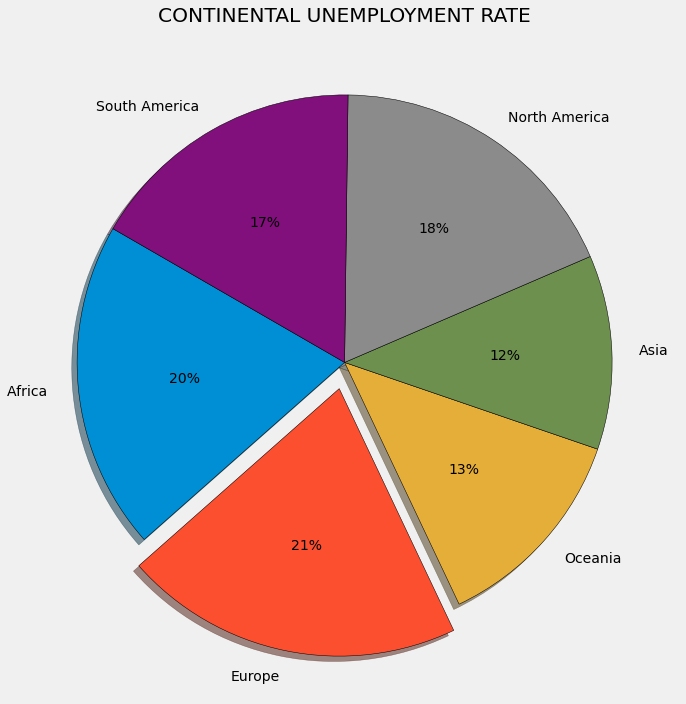

In [566]:
# plotting the total average of unemployment rate of each continent
plt.style.use('fivethirtyeight')

slices = [9.602848,9.924748,6.145249,5.675665,8.858887,8.159892]
labels = ["Africa ","Europe","Oceania","Asia","North America","South America"]
explode = [0,0.1,0,0,0,0]

plt.pie(slices, labels = labels, explode = explode, shadow = True, autopct = '%1.0f%%',startangle= 150,
        wedgeprops ={'edgecolor': 'black'})

plt.title("CONTINENTAL UNEMPLOYMENT RATE")
plt.tight_layout()
plt.show()

In [567]:
#dataframe of yearly average of continents
conti2 = conti_grp.mean()
conti2

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
continent,,,,,,,,,,,,,,,,,,,,,
Africa,9.522642,9.698113,9.840189,9.895660,9.997358,9.932075,9.907547,9.861321,9.865472,9.841321,...,9.240755,9.132453,9.121321,9.222075,9.277547,9.284528,9.237925,9.264340,10.307736,10.473585
Asia,4.157708,4.245417,4.566875,4.926042,5.055625,5.409167,5.508542,6.027292,6.271667,6.028125,...,5.590833,5.671458,5.655208,5.688542,5.752917,5.745417,5.588958,5.448125,6.557708,6.439167
Europe,7.928205,9.292821,10.886154,11.255897,11.371282,11.643590,11.163333,10.989744,10.950000,10.797692,...,11.421282,11.474615,10.914872,10.237949,9.346410,8.303846,7.392051,6.748718,7.450000,7.428205
North America,10.221000,10.408000,10.542000,10.248500,9.987000,9.805500,9.636000,9.308500,8.742000,8.303500,...,8.818000,9.110000,8.809000,8.339000,8.167000,7.599000,7.494500,7.375000,9.683000,9.550500
Oceania,6.068182,6.270000,6.397273,6.398182,6.193636,6.322727,6.552727,6.435455,6.862727,6.931818,...,6.508182,6.361818,6.018182,5.970909,5.753636,5.763636,5.770000,5.719091,6.501818,6.561818
South America,7.624167,7.490833,7.340833,7.532500,7.865833,9.163333,8.650000,8.626667,10.315000,10.538333,...,6.410833,6.335000,6.347500,6.610000,7.230833,7.281667,7.496667,7.719167,10.275000,9.924167


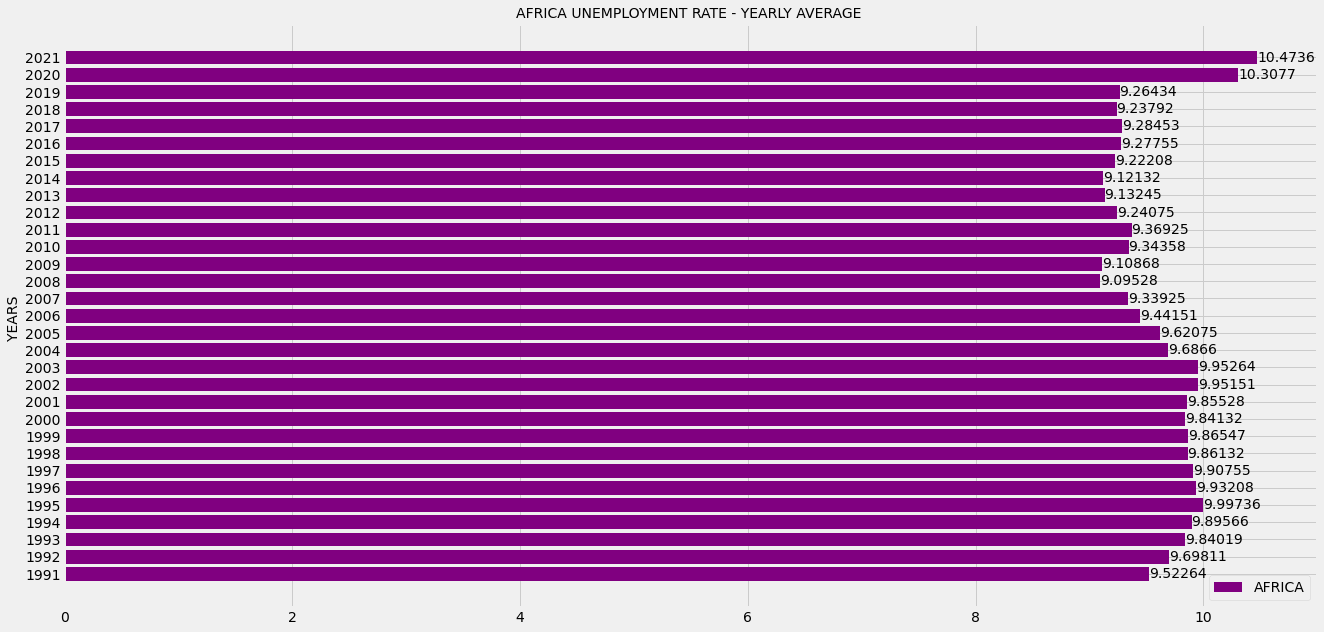

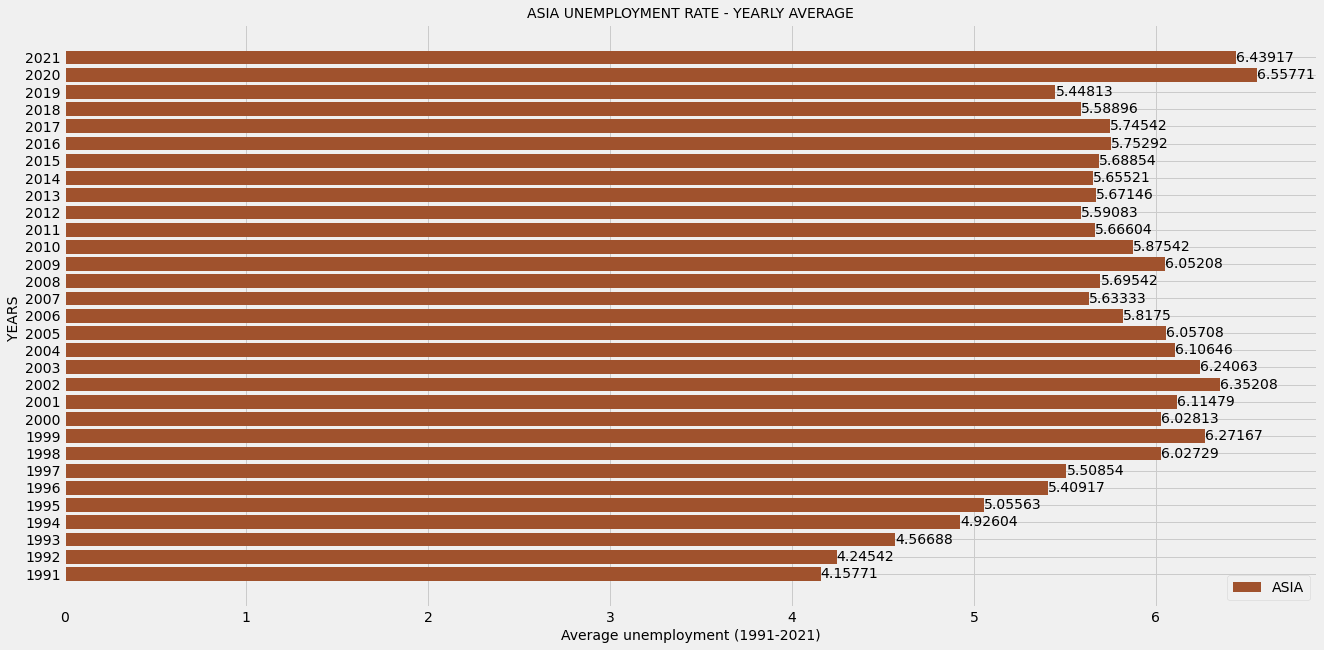

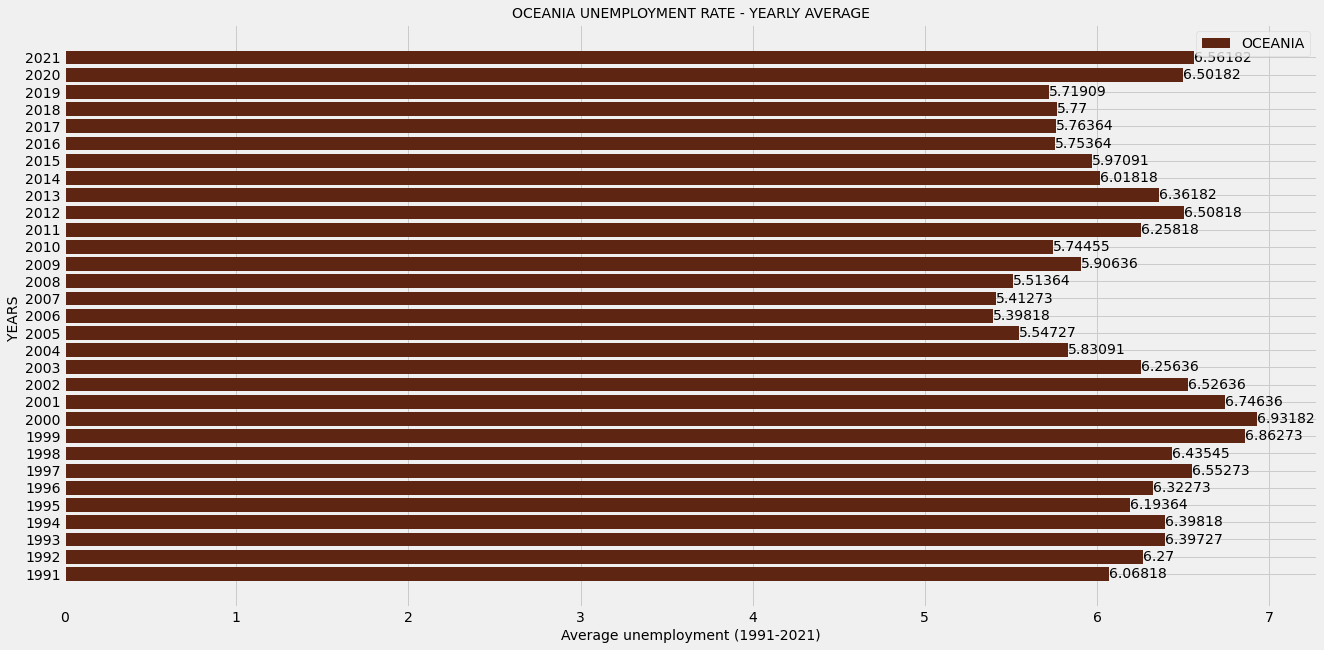

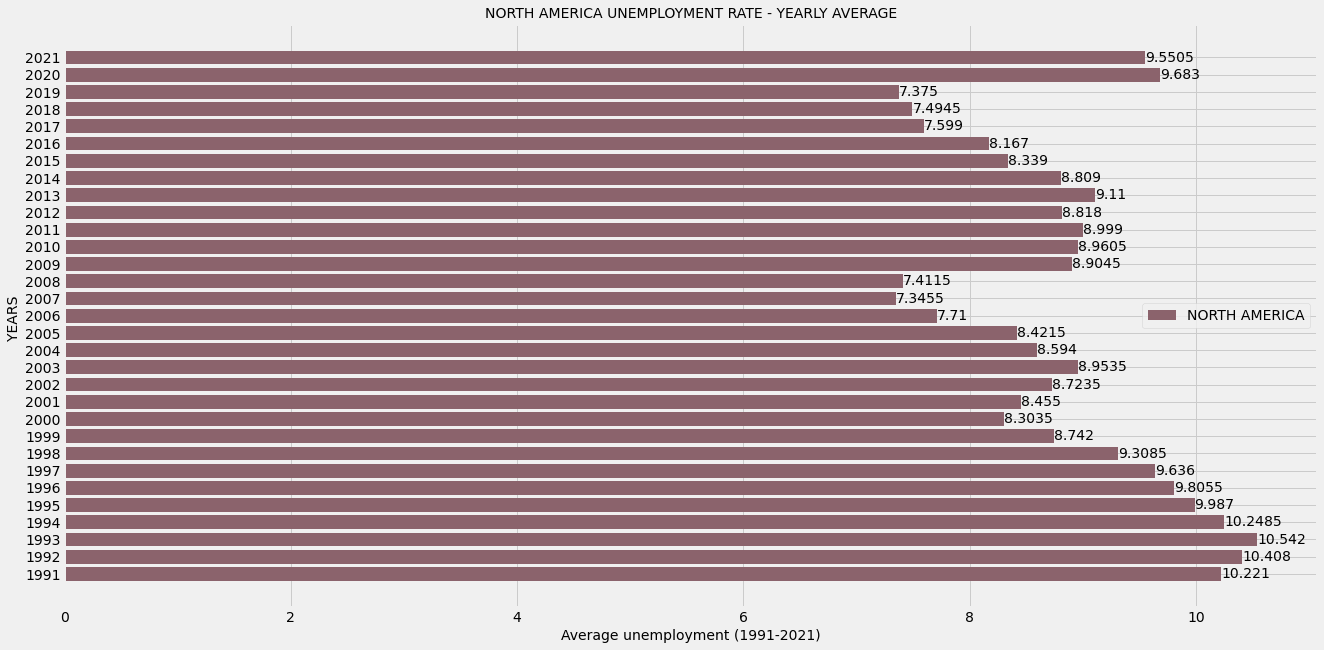

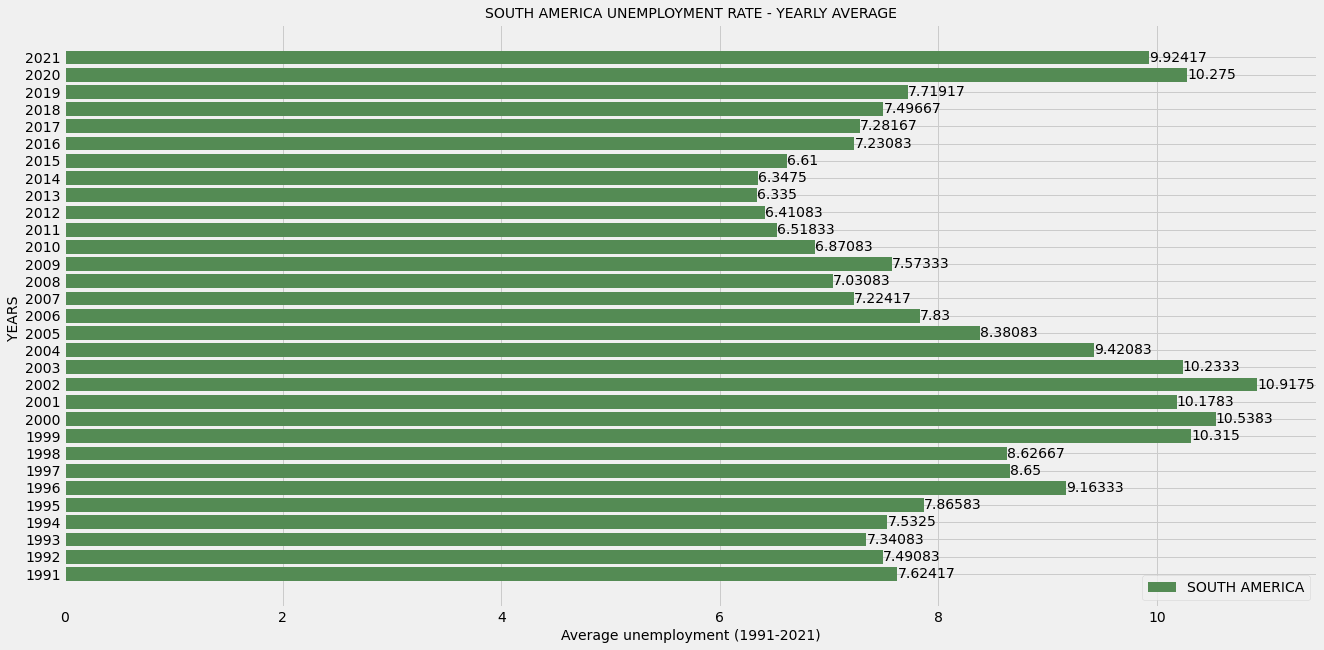

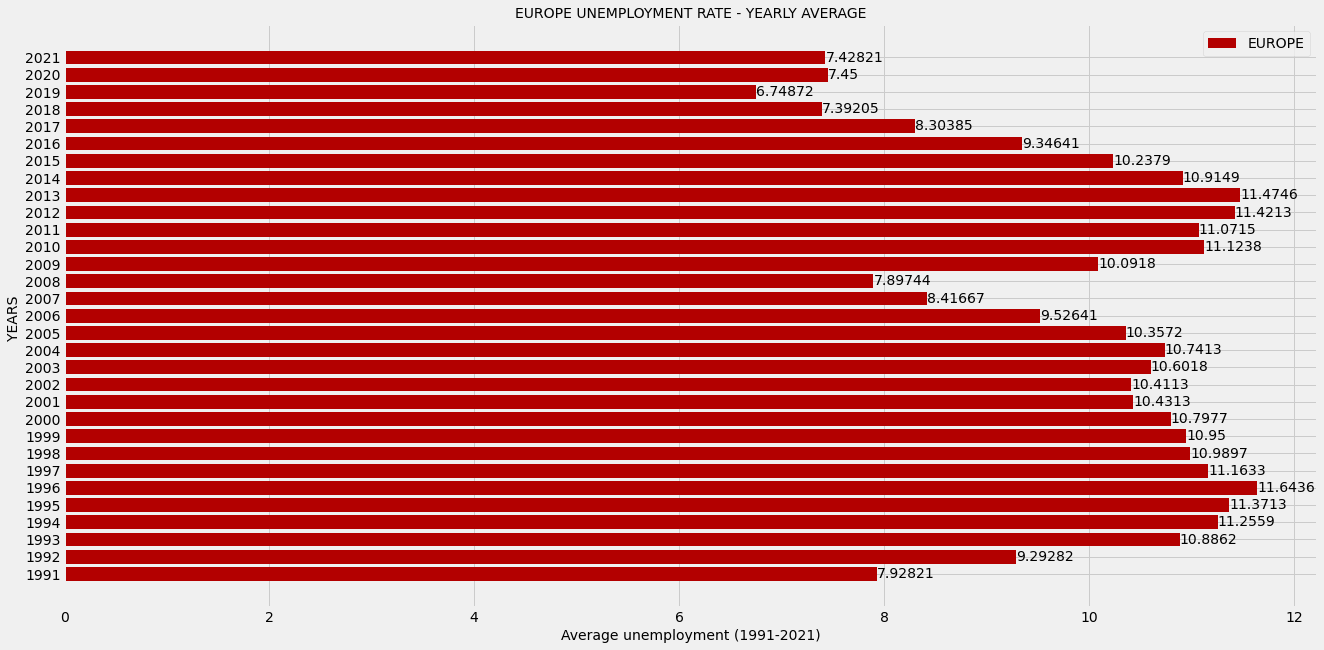

In [568]:
# plotting the average the unemployment rate of the years of each continent
#fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(nrows=6,ncols=1,sharex=True)

plt.style.use('fivethirtyeight')

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()
fig4, ax4 = plt.subplots()
fig5, ax5 = plt.subplots()
fig6, ax6 = plt.subplots()

ax1.barh(average_africa.index, average_africa.values,color= '#800080', label="AFRICA")
ax2.barh(average_asia.index, average_asia.values,color = '#A0522D', label="ASIA")
ax3.barh(average_oceania.index, average_oceania.values,color = '#5E2612', label="OCEANIA")
ax4.barh(average_north_america.index, average_north_america.values,color = '#8B636C', label="NORTH AMERICA")
ax5.barh(average_south_america.index, average_south_america.values,color = '#548B54', label="SOUTH AMERICA")
ax6.barh(average_europe.index, average_europe.values,color = '#b30000', label="EUROPE")

plt.rcParams["figure.figsize"] = (20,10)

ax1.set_title("AFRICA UNEMPLOYMENT RATE - YEARLY AVERAGE ", fontsize=14)
ax1.set_ylabel('YEARS ', fontsize=14)

ax2.set_title("ASIA UNEMPLOYMENT RATE - YEARLY AVERAGE", fontsize=14)
ax2.set_xlabel('Average unemployment (1991-2021)', fontsize=14)
ax2.set_ylabel('YEARS ', fontsize=14)

ax3.set_title("OCEANIA UNEMPLOYMENT RATE - YEARLY AVERAGE", fontsize=14)
ax3.set_xlabel('Average unemployment (1991-2021)', fontsize=14)
ax3.set_ylabel('YEARS ', fontsize=14)

ax4.set_title("NORTH AMERICA UNEMPLOYMENT RATE - YEARLY AVERAGE", fontsize=14)
ax4.set_xlabel('Average unemployment (1991-2021)', fontsize=14)
ax4.set_ylabel('YEARS ', fontsize=14)

ax5.set_title("SOUTH AMERICA UNEMPLOYMENT RATE - YEARLY AVERAGE", fontsize=14)
ax5.set_xlabel('Average unemployment (1991-2021)', fontsize=14)
ax5.set_ylabel('YEARS ', fontsize=14)

ax6.set_title("EUROPE UNEMPLOYMENT RATE - YEARLY AVERAGE", fontsize=14)
ax6.set_xlabel('Average unemployment (1991-2021)', fontsize=14)
ax6.set_ylabel('YEARS ', fontsize=14)


for bars in ax1.containers:
    ax1.bar_label(bars)
for bars in ax2.containers:
    ax2.bar_label(bars)
for bars in ax3.containers:
    ax3.bar_label(bars)
for bars in ax4.containers:
    ax4.bar_label(bars)
for bars in ax5.containers:
    ax5.bar_label(bars)
for bars in ax6.containers:
    ax6.bar_label(bars)

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
ax6.legend()

plt.show()

In [569]:
#setting index to country
df3 = df.set_index('country')
df3.tail(5)

,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,continent
country,,,,,,,,,,,,,,,,,,,,,
Samoa,WSM,2.10,2.38,2.63,3.04,3.19,3.47,3.90,4.18,4.48,...,8.67,8.72,8.50,8.31,8.58,8.69,8.41,9.15,9.84,Oceania
Yemen,YEM,8.32,8.31,8.35,8.34,8.96,9.59,10.20,10.81,11.46,...,13.27,13.47,13.77,13.43,13.30,13.15,13.06,13.39,13.57,Asia
South Africa,ZAF,29.95,29.98,29.92,29.89,29.89,29.87,29.91,29.95,29.91,...,24.56,24.89,25.15,26.54,27.04,26.91,28.47,29.22,33.56,Africa
Zambia,ZMB,18.90,19.37,19.70,18.43,16.81,15.30,13.64,12.00,12.44,...,8.61,9.36,10.13,10.87,11.63,12.01,12.52,12.85,13.03,Africa
Zimbabwe,ZWE,4.94,4.99,4.97,4.96,5.63,6.25,6.93,6.46,6.00,...,4.98,4.77,4.78,4.79,4.78,4.80,4.83,5.35,5.17,Africa


/var/folders/vq/f461sw695b91wmsfd0_fqjhr0000gn/T/ipykernel_5505/4117361597.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  average_unemployment = df3.mean(axis="index").sort_values()


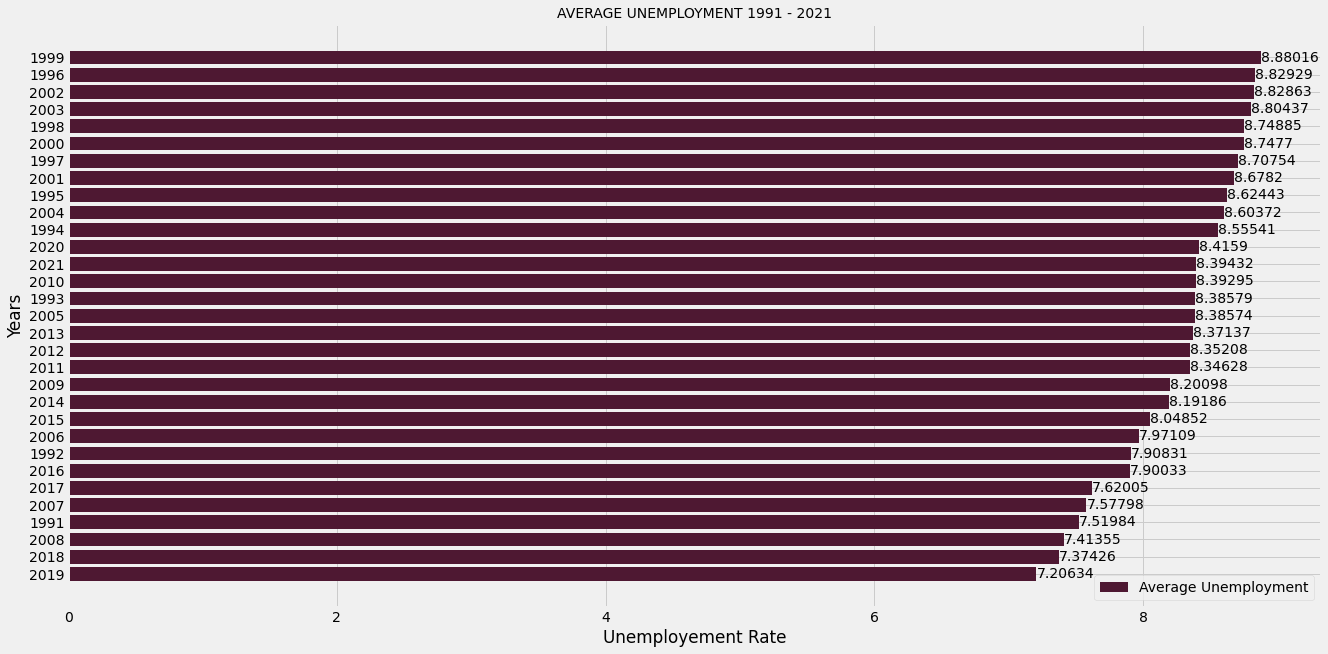

In [570]:
# plotting the average the unemployment rate of the years of the world

plt.style.use('fivethirtyeight')

average_unemployment = df3.mean(axis="index").sort_values()

fig1, ax1 = plt.subplots()
ax1.barh(average_unemployment.index, average_unemployment.values,color = '#4e1832',label="Average Unemployment")
plt.rcParams["figure.figsize"] = (20,10)
ax1.set_title('AVERAGE UNEMPLOYMENT 1991 - 2021', fontsize=14)
ax1.set_xlabel('Unemployement Rate')
ax1.set_ylabel('Years')

for bars in ax1.containers:
    ax1.bar_label(bars)

ax1.legend()

plt.show()

In [571]:
#gropping countries by population based on wikipedia statistics

highly_populated = df3.mean(axis = 'columns').loc[['Bangladesh','Mexico','Japan','Ethiopia','Philippines','Colombia',
                             'Kenya','Myanmar','Italy','South Africa','France','Tanzania','United Kingdom',
                             'Thailand','Germany','Vietnam']].sort_values()
averagely_populated = df3.mean(axis="columns").loc[['United Arab Emirates','Israel','Austria','Togo','Switzerland','Sierra Leone',
                            'Serbia','Nicaragua','Libya','Bulgaria','Paraguay','Turkmenistan','El Salvador',
                            'Denmark','Lebanon']].sort_values()
most_populated = df3.mean(axis="columns").loc[['China','India','United States','Indonesia','Pakistan','Nigeria',
                                  'Brazil']].sort_values()
least_populated = df3.mean(axis="columns").loc[['Iceland','Suriname','Maldives','Malta','Luxembourg','Montenegro',
                                  'Solomon Islands']].sort_values()

/var/folders/vq/f461sw695b91wmsfd0_fqjhr0000gn/T/ipykernel_5505/2773127203.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  highly_populated = df3.mean(axis = 'columns').loc[['Bangladesh','Mexico','Japan','Ethiopia','Philippines','Colombia',
/var/folders/vq/f461sw695b91wmsfd0_fqjhr0000gn/T/ipykernel_5505/2773127203.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  averagely_populated = df3.mean(axis="columns").loc[['United Arab Emirates','Israel','Austria','Togo','Switzerland','Sierra Leone',
/var/folders/vq/f461sw695b91wmsfd0_fqjhr0000gn/T/ipykernel_5505/2773127203.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'n

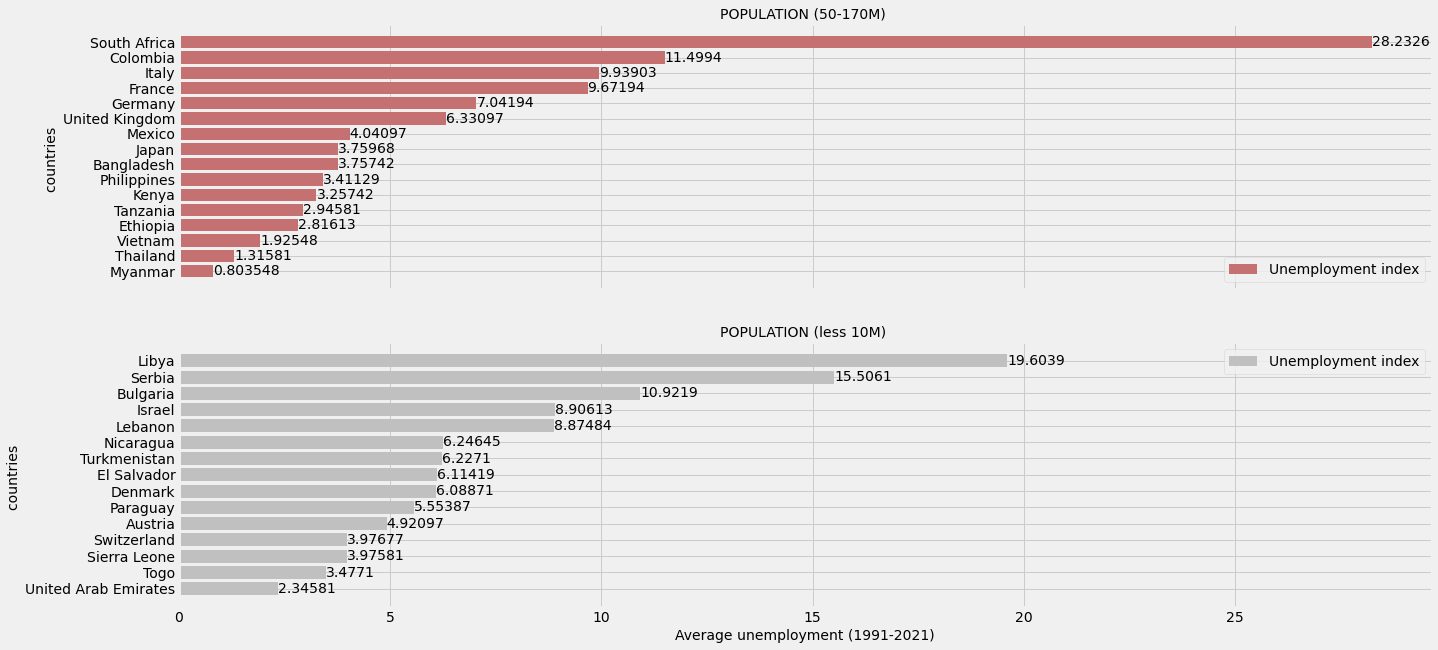

In [572]:
#plotting the unemployment rate  sample of the averagely and highly populated countries

plt.style.use('fivethirtyeight')

fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,sharex=True)

ax1.barh(highly_populated.index, highly_populated.values,color= '#C67171', label="Unemployment index")
ax2.barh(averagely_populated.index, averagely_populated.values,color = '#C0C0C0', label="Unemployment index")
plt.rcParams["figure.figsize"] = (20,10)
ax1.set_title("POPULATION (50-170M) ", fontsize=14)
ax1.set_ylabel('countries ', fontsize=14)

ax2.set_title("POPULATION (less 10M) ", fontsize=14)
ax2.set_xlabel('Average unemployment (1991-2021)', fontsize=14)
ax2.set_ylabel('countries ', fontsize=14)



for bars in ax1.containers:
    ax1.bar_label(bars)
for bars in ax2.containers:
    ax2.bar_label(bars)

ax1.legend()
ax2.legend()

plt.show()

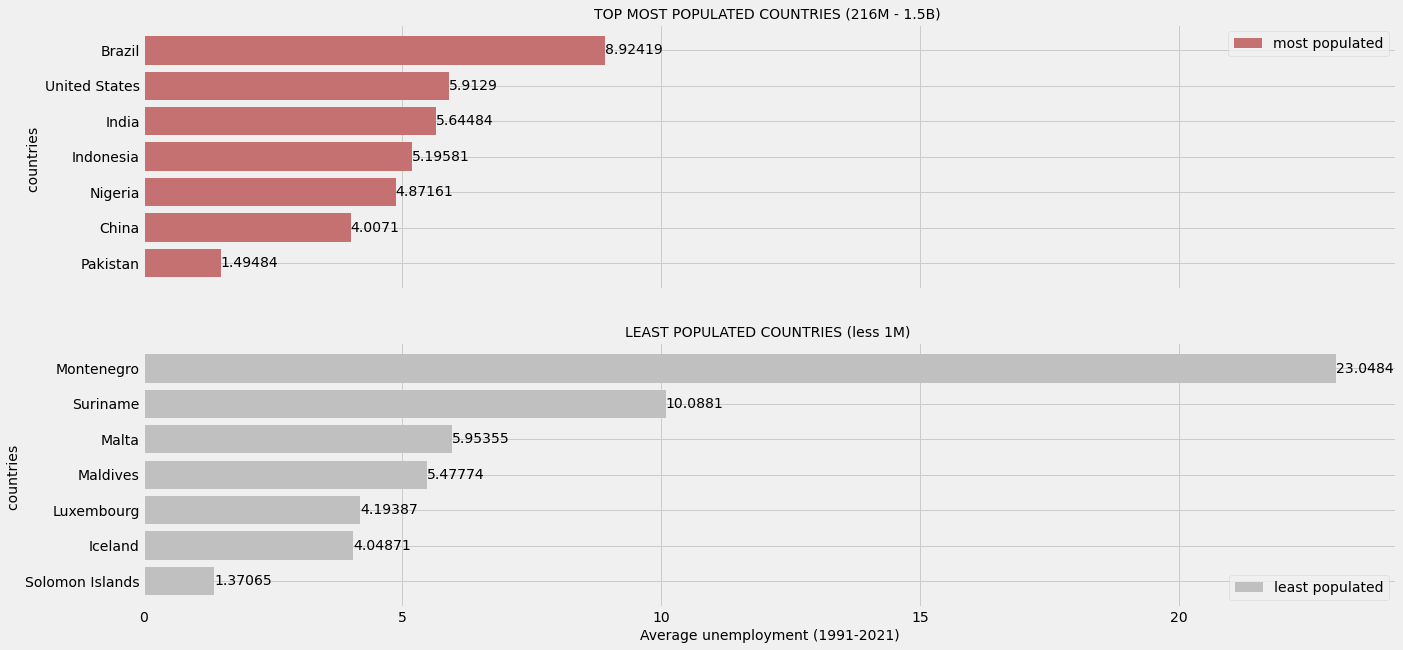

In [573]:
#plotting  the unemployment rate sample of the most and least populated countries

plt.style.use('fivethirtyeight')

fig, (ax3,ax4) = plt.subplots(nrows=2,ncols=1,sharex=True)

ax3.barh(most_populated.index, most_populated.values,color= '#C67171', label="most populated")
ax4.barh(least_populated .index, least_populated .values,color = '#C0C0C0', label="least populated")
plt.rcParams["figure.figsize"] = (20,10)
ax3.set_title("TOP MOST POPULATED COUNTRIES (216M - 1.5B) ", fontsize=14)
ax3.set_ylabel('countries ', fontsize=14)

ax4.set_title("LEAST POPULATED COUNTRIES (less 1M) ", fontsize=14)
ax4.set_xlabel('Average unemployment (1991-2021)', fontsize=14)
ax4.set_ylabel('countries ', fontsize=14)


for bars in ax3.containers:
    ax3.bar_label(bars)
for bars in ax4.containers:
    ax4.bar_label(bars)

ax3.legend()
ax4.legend()

plt.show()

In [574]:
#groupping countries by education system based on 2021 Best Countries Report

best_edu_sys = df3.mean(axis = 'columns').loc[['United States','United Kingdom','Germany','Canada','France',
                             'Switzerland','Japan','Australia','Sweden','Netherlands']].sort_values()
worst_edu_sys = df3.mean(axis = 'columns').loc[['Niger','Burkina Faso','Mali','Central African Republic','Ethiopia',
                             'Eritrea','Guinea','Pakistan','Gambia','Angola']].sort_values()


/var/folders/vq/f461sw695b91wmsfd0_fqjhr0000gn/T/ipykernel_5505/3899035979.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  best_edu_sys = df3.mean(axis = 'columns').loc[['United States','United Kingdom','Germany','Canada','France',
/var/folders/vq/f461sw695b91wmsfd0_fqjhr0000gn/T/ipykernel_5505/3899035979.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  worst_edu_sys = df3.mean(axis = 'columns').loc[['Niger','Burkina Faso','Mali','Central African Republic','Ethiopia',


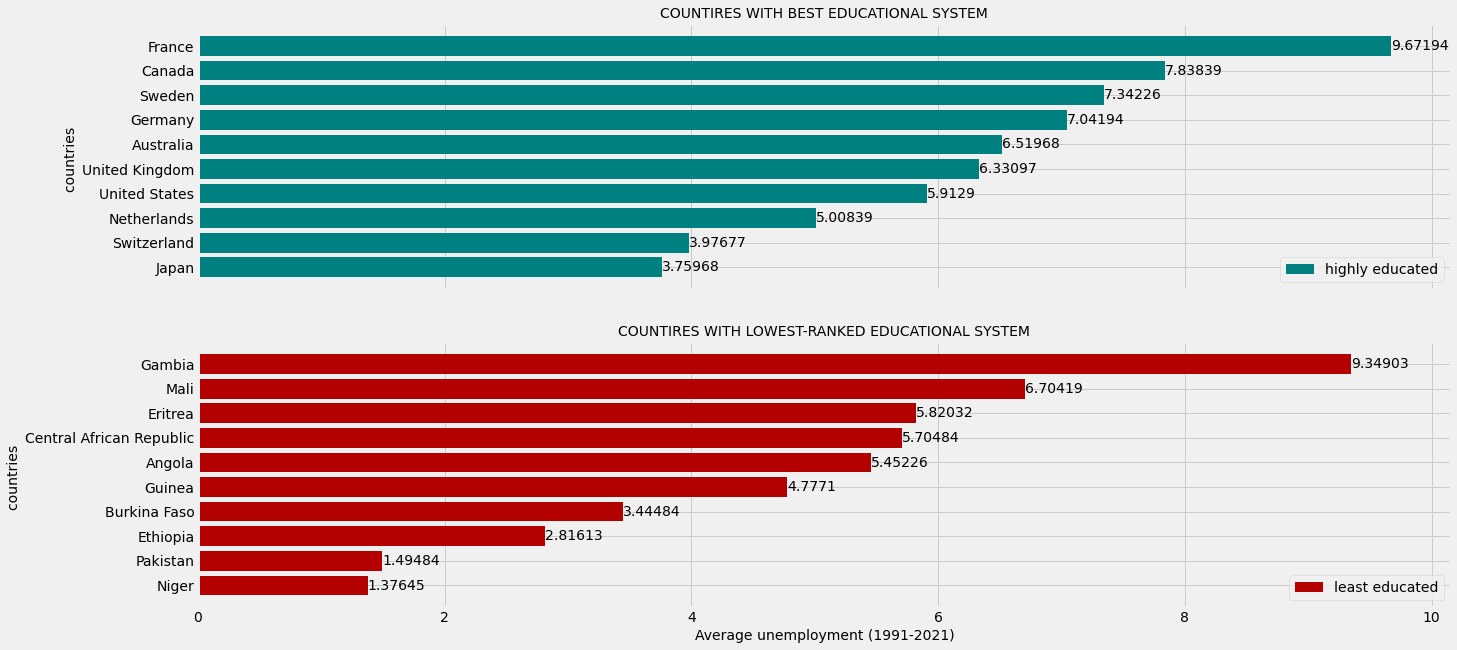

In [575]:
#plotting the unemployment rate of the worst and best educational system

plt.style.use('fivethirtyeight')

fig, (ax3,ax4) = plt.subplots(nrows=2,ncols=1,sharex=True)

ax3.barh(best_edu_sys.index, best_edu_sys.values,color= '#008080', label="highly educated")
ax4.barh(worst_edu_sys.index, worst_edu_sys.values,color = '#b30000', label="least educated")
plt.rcParams["figure.figsize"] = (20,10)
ax3.set_title("COUNTIRES WITH BEST EDUCATIONAL SYSTEM", fontsize=14)
ax3.set_ylabel('countries ', fontsize=14)

ax4.set_title("COUNTIRES WITH LOWEST-RANKED EDUCATIONAL SYSTEM", fontsize=14)
ax4.set_xlabel('Average unemployment (1991-2021)', fontsize=14)
ax4.set_ylabel('countries ', fontsize=14)


for bars in ax3.containers:
    ax3.bar_label(bars)
for bars in ax4.containers:
    ax4.bar_label(bars)

ax3.legend()
ax4.legend()

plt.show()

In [576]:
#finding average umemployement of all countries together
average_country_unemployment = df3.mean(axis = 'columns').sort_values()
average_country_unemployment_2 = df3.mean(axis = 'columns')
average_country_unemployment_2.mean()

/var/folders/vq/f461sw695b91wmsfd0_fqjhr0000gn/T/ipykernel_5505/1547238069.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  average_country_unemployment = df3.mean(axis = 'columns').sort_values()
/var/folders/vq/f461sw695b91wmsfd0_fqjhr0000gn/T/ipykernel_5505/1547238069.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  average_country_unemployment_2 = df3.mean(axis = 'columns')


8.257607967565663

In [577]:
#locating the countries with the highest, average and least unemployment rate
#df3.mean(axis = 'columns').astype(float)> 10

highest_country_rate= df3.mean(axis = 'columns').sort_values()[-10:]
lowest_country_rate = df3.mean(axis = 'columns').sort_values()[:10]
average_country_rate = df3.mean(axis = 'columns').sort_values()[104:114]

/var/folders/vq/f461sw695b91wmsfd0_fqjhr0000gn/T/ipykernel_5505/3492414192.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  highest_country_rate= df3.mean(axis = 'columns').sort_values()[-10:]
/var/folders/vq/f461sw695b91wmsfd0_fqjhr0000gn/T/ipykernel_5505/3492414192.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  lowest_country_rate = df3.mean(axis = 'columns').sort_values()[:10]
/var/folders/vq/f461sw695b91wmsfd0_fqjhr0000gn/T/ipykernel_5505/3492414192.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns befo

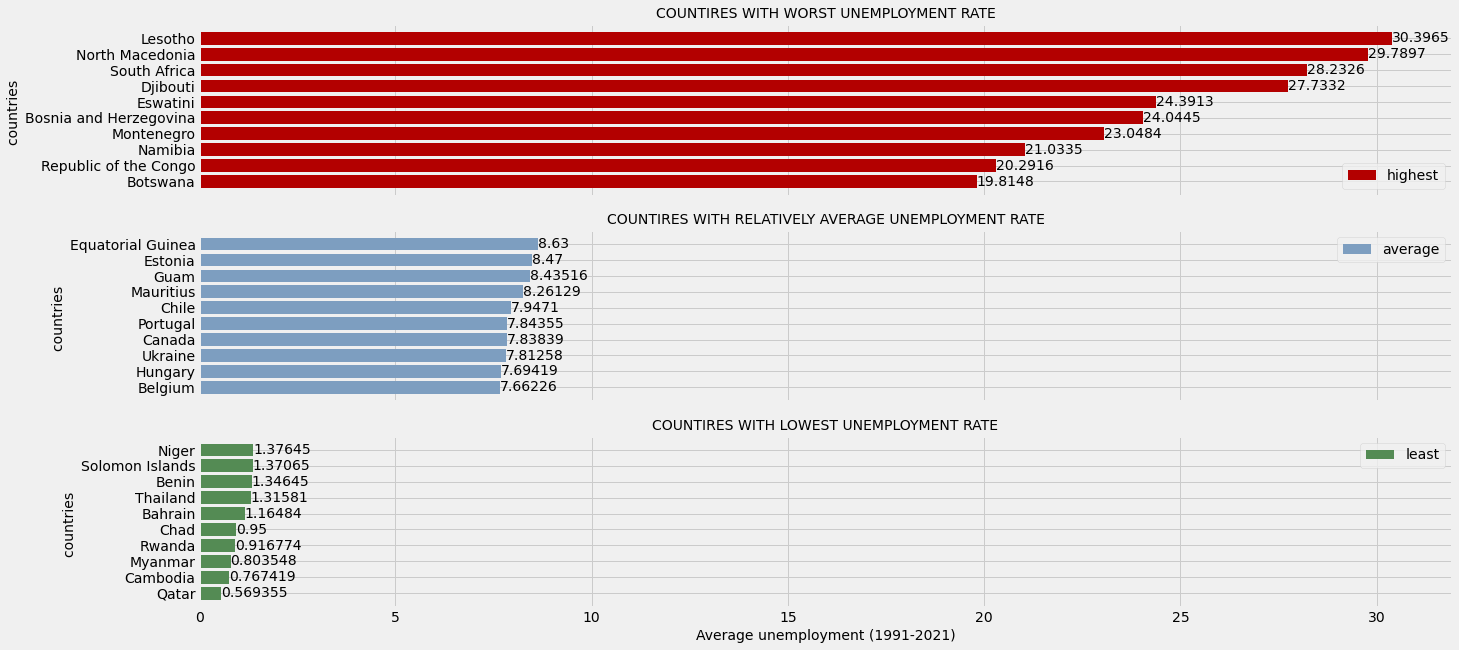

In [578]:
plt.style.use('fivethirtyeight')

fig, (ax3,ax4,ax5) = plt.subplots(nrows=3,ncols=1,sharex=True)

ax3.barh(highest_country_rate.index, highest_country_rate.values,color= '#b30000', label="highest")
ax4.barh(average_country_rate.index, average_country_rate.values,color = '#7D9EC0', label="average")
ax5.barh(lowest_country_rate.index, lowest_country_rate.values,color = '#548B54', label="least")
plt.rcParams["figure.figsize"] = (20,10)

ax3.set_title("COUNTIRES WITH WORST UNEMPLOYMENT RATE", fontsize=14)
ax3.set_ylabel('countries ', fontsize=14)

ax4.set_title("COUNTIRES WITH RELATIVELY AVERAGE UNEMPLOYMENT RATE", fontsize=14)
ax4.set_ylabel('countries ', fontsize=14)

ax5.set_title("COUNTIRES WITH LOWEST UNEMPLOYMENT RATE", fontsize=14)
ax5.set_xlabel('Average unemployment (1991-2021)', fontsize=14)
ax5.set_ylabel('countries ', fontsize=14)


for bars in ax3.containers:
    ax3.bar_label(bars)
for bars in ax4.containers:
    ax4.bar_label(bars)
for bars in ax5.containers:
    ax5.bar_label(bars)
    
ax3.legend()
ax4.legend()
ax5.legend()

plt.show()

In [579]:
#shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#dropping Antarctica because it irrelavant
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [580]:
df3.mean(axis = 'columns')
df3['Average rate'] = df3.mean(axis = 'columns')
#creating a dateframe for country code and yearly average for each country
df_new = df3[['Country Code', 'Average rate']]
#renaming country code to iso_a3 to be able to merge dataframe with shapefile
df_new = df_new.rename(columns = {"Country Code":"iso_a3"})
world = world.merge(df_new, on='iso_a3')
world.head(5)

/var/folders/vq/f461sw695b91wmsfd0_fqjhr0000gn/T/ipykernel_5505/1133255864.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df3.mean(axis = 'columns')
/var/folders/vq/f461sw695b91wmsfd0_fqjhr0000gn/T/ipykernel_5505/1133255864.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df3['Average rate'] = df3.mean(axis = 'columns')


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Average rate
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",4.152581
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",2.945806
2,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",7.838387
3,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",5.912903
4,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",7.131613


<AxesSubplot:>

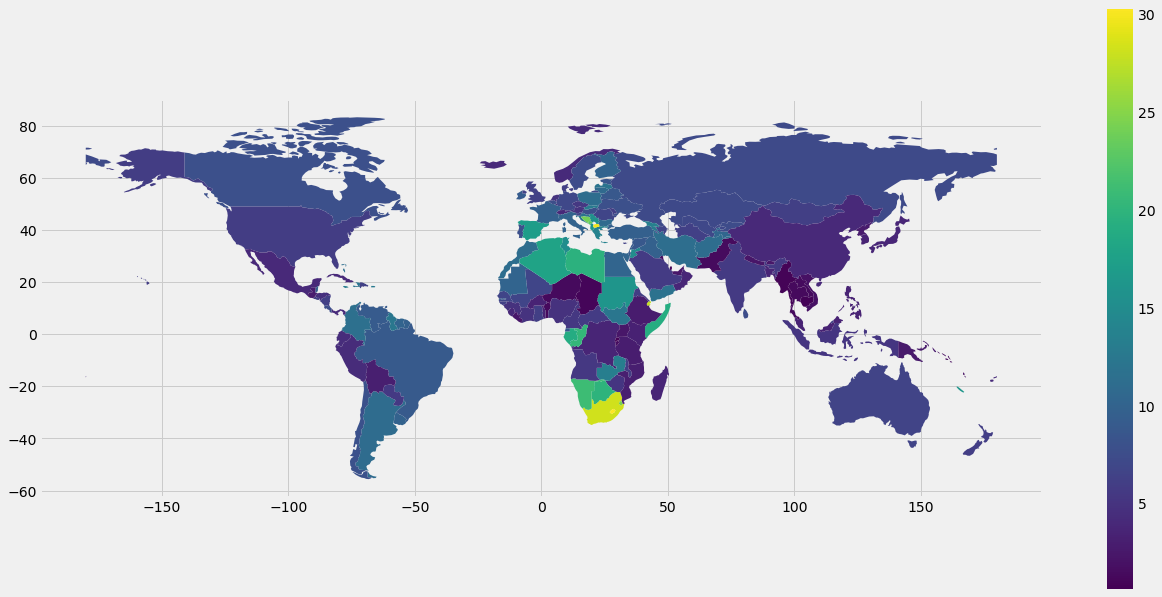

In [581]:
#plotting each country's average rate on the world map
fig, ax = plt.subplots(1, 1)
world.plot(column='Average rate', ax=ax, legend=True)